In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import dedalus.public as de
import numpy as np
import h5py
import transpose

In [2]:
data =h5py.File("run_B/data_checkpoints/data_checkpoints_s10.h5","r")

In [3]:
data['scales/sim_time'][0]

4.5000000000000003e-05

<IPython.core.display.Javascript object>


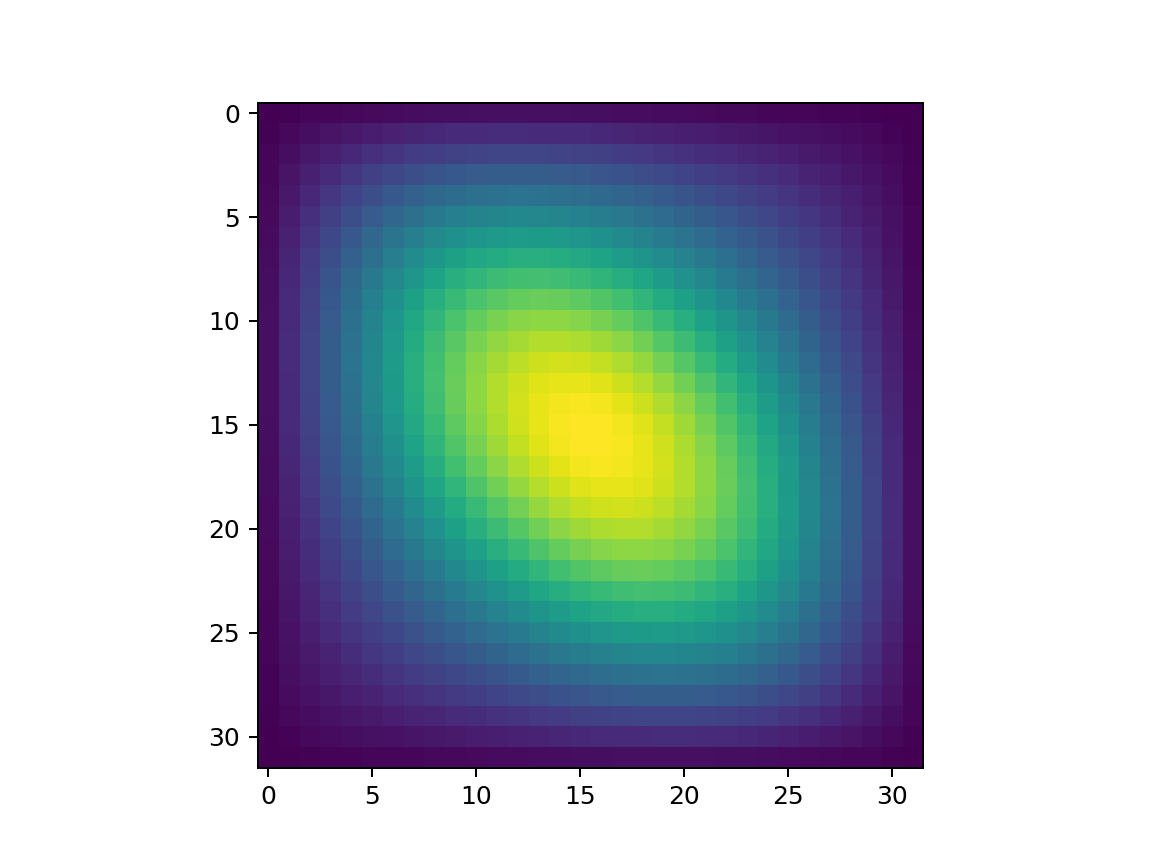

In [4]:
plt.figure()
plt.imshow(data['tasks/css'][0,30])

In [5]:
def calc_sym(field):
    trans = np.transpose(field,(0,2,1))
    return (np.abs(trans - field)).max()

In [6]:
print("Max asym css: %e ctt: %e"%(calc_sym(data['tasks/css'][0,:,:,:]), calc_sym(data['tasks/ctt'][0,:,:,:])))

Max asym css: 1.776357e-14 ctt: 2.168404e-19


In [7]:
x = de.Fourier('x', 64)
y1 = de.SinCos('y1', 32)
y2 = de.SinCos('y2', 32)

dom = de.Domain([x,y1,y2], grid_dtype='float')

In [8]:
css = dom.new_field()
ctt = dom.new_field()
css.meta['y1']['parity'] = -1
css.meta['y2']['parity'] = -1
ctt.meta['y1']['parity'] = -1
ctt.meta['y2']['parity'] = -1

In [9]:
css['g'] = data['tasks/css']
ctt['g'] = data['tasks/ctt']

In [23]:
def calc_sym_task_L2(field):
    trans = transpose.TransposeOperator(field).evaluate()
    data = trans - field
    L2 = (data.evaluate()).integrate()
    return L2['g'][0,0,0]

In [20]:
def calc_sym_task(field):
    trans = transpose.TransposeOperator(field).evaluate()
    return (np.abs(trans['g'] - field['g'])).max()

In [21]:
print("Max asym css: %e ctt: %e"%(calc_sym_task(css), calc_sym_task(ctt)))

Max asym css: 1.776357e-14 ctt: 2.168404e-19


In [24]:
print("Max asym css: %e ctt: %e"%(calc_sym_task_L2(css), calc_sym_task_L2(ctt)))

Max asym css: 7.087422e-32 ctt: -1.422348e-36
